<a href="https://colab.research.google.com/github/mrunaliniskulkarni100/DepressionAnalyser/blob/master/IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded=files.upload()


Saving Iris (1).csv to Iris (1).csv


In [0]:
df=pd.read_csv("Iris (1).csv")

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
df.shape

(150, 6)

**Visualization**

In [0]:
d=df.loc[:,"SepalLengthCm":"Species"]

In [0]:
from sklearn .preprocessing import LabelEncoder
l=LabelEncoder()
d.loc[:,'Species']=l.fit_transform(df.loc[:,'Species'])

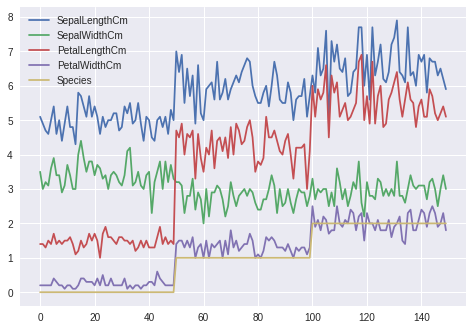

In [47]:
d.plot(kind='line')

**There is a clear difference in PetalWidth of species 0 and 1. There is also a difference in petal width of 1 and 2, but it is not as different as 0 and 1. Same for petal length. The topmost values for species 1 and the lowermost values for species 2 are almost the same. This is the problem area. Rest is easy. Sepal Width decreases from species 0 to 1, but is same for 1 and 2. Sepal Length increases from species 0 to 2, but the difference is more defined between 0 and 1 than in 1 and 2.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48ec1840b8>,
      dtype=object)

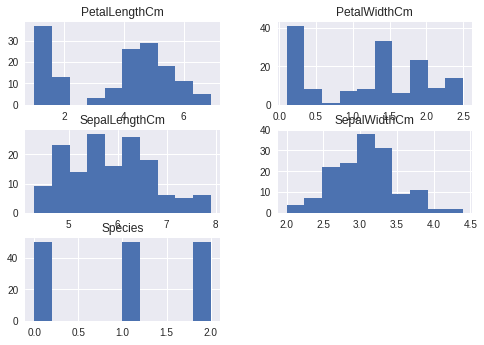

In [48]:
d.hist()

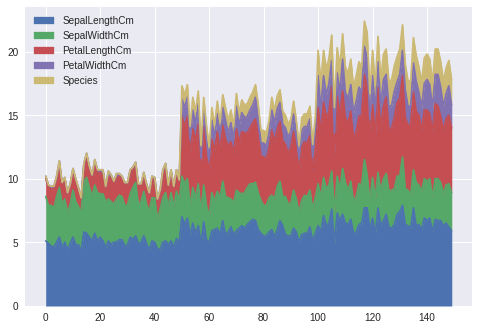

In [49]:
d.plot(kind='Area')

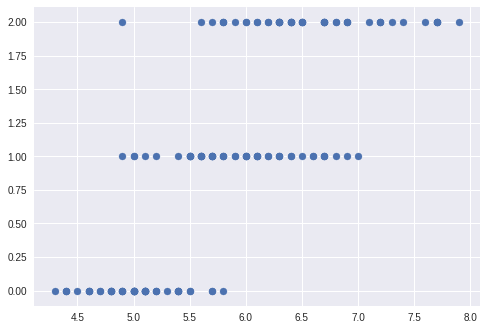

In [51]:
plt.scatter(d.loc[:,'SepalLengthCm'], d.loc[:,'Species'])

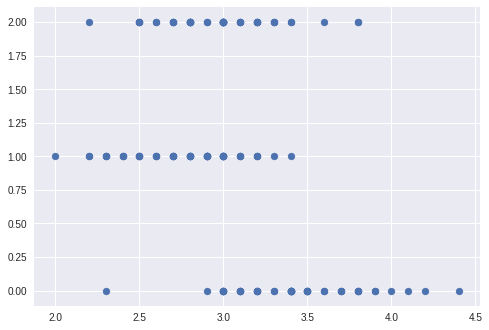

In [52]:
plt.scatter(d.loc[:,'SepalWidthCm'], d.loc[:,'Species'])

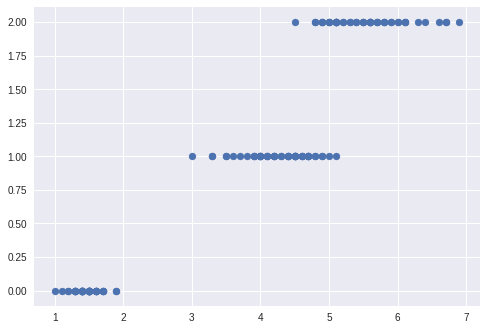

In [53]:
plt.scatter(d.loc[:,'PetalLengthCm'], d.loc[:,'Species'])

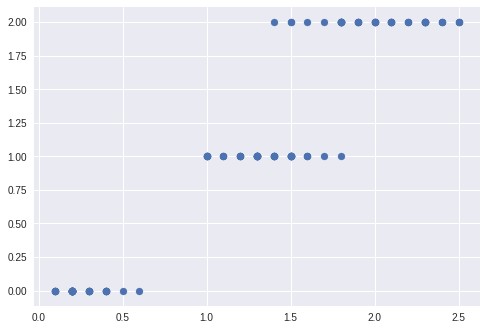

In [54]:
plt.scatter(d.loc[:,'PetalWidthCm'], d.loc[:,'Species'])

**Preprocessing**

In [0]:
X=df.loc[:,'SepalLengthCm':'PetalWidthCm'].values
y=df.loc[:,'Species'].values

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)





In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

**Modelling**

**Based on visualizations, I think either KNN or logistic regression might do the job or neural networks(I don't know how to do that yet)**

In [59]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred))

0.9736842105263158


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred1=knn.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred1))

0.9473684210526315


**Logistic Regression gives a better result. Hence we will use Logistic Regression.**